___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

# PART- 3 `( Handling With Outliers )`

In [2]:
df = pd.read_csv("cleaned_data_scout.csv")

In [3]:
data = df.copy

In [4]:
df.shape

(15909, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15909 non-null  object 
 1   body_type            15909 non-null  object 
 2   price                15909 non-null  int64  
 3   vat                  15909 non-null  object 
 4   km                   15909 non-null  float64
 5   Type                 15909 non-null  object 
 6   Fuel                 15909 non-null  object 
 7   Gears                15909 non-null  float64
 8   Extras               15909 non-null  object 
 9   Previous_Owners      15909 non-null  float64
 10  hp_kW                15909 non-null  float64
 11  age                  15909 non-null  float64
 12  Paint_Type           15909 non-null  object 
 13  Upholstery_type      15909 non-null  object 
 14  Nr_of_Doors          15909 non-null  float64
 15  Nr_of_Seats          15909 non-null 

In [6]:
df.describe(exclude= "object").T

,count,mean,std,min,25%,50%,75%,max
price,15909.000,18019.186,7384.579,13.000,12850.000,16900.000,21900.000,74600.000
km,15909.000,32084.265,36986.803,0.000,2493.427,20407.000,46928.000,317000.000
Gears,15909.000,5.938,0.705,5.000,5.000,6.000,6.000,8.000
Previous_Owners,15909.000,1.040,0.254,0.000,1.000,1.000,1.000,4.000
hp_kW,15909.000,88.371,26.834,1.000,66.000,85.000,101.000,294.000
age,15909.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Nr_of_Doors,15909.000,4.661,0.642,1.000,4.000,5.000,5.000,7.000
Nr_of_Seats,15909.000,4.952,0.476,2.000,5.000,5.000,5.000,7.000
Displacement_cc,15909.000,1425.547,329.775,1.000,1229.000,1461.000,1598.000,16000.000
Weight_kg,15909.000,1337.437,200.437,1.000,1165.000,1295.000,1472.000,2471.000


In [7]:
# Calculating of limits
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)

In [8]:
# Counting of Outliers
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return ((df[column]<lower_lim) | (df[column]>upper_lim)).sum()
    

In [9]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df[column].loc[~((df[column]<lower_lim) | (df[column]>upper_lim))]


In [10]:
#Explore different quantiles at the upper end
def winsorize_percentage_selection(df,column):
    print('90% quantile:   ', df[column].quantile(0.90))      
    print('92.5% quantile: ', df[column].quantile(0.925))      
    print('95% quantile:   ', df[column].quantile(0.95))       
    print('97.5% quantile: ', df[column].quantile(0.975))      
    print('99% quantile:   ', df[column].quantile(0.99))       
    print('99.9% quantile: ', df[column].quantile(0.999))

## price 

In [11]:
df.price.count()

15909

In [12]:
df.price.describe()

count   15909.000
mean    18019.186
std      7384.579
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [13]:
df.price.sort_values(ascending=True).head(10)

8592       13
8826      120
6064      255
8827      331
8825     4950
8823     4990
8824     5250
8822     5300
13764    5445
8821     5450
Name: price, dtype: int64

In [14]:
limits(df,"price")

Lower Limit: -725.0
Upper limit: 35475.0


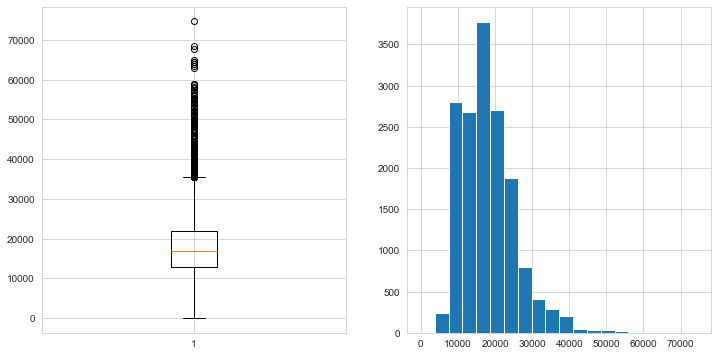

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [16]:
outliers(df,"price") 

479

In [17]:
winsorize_percentage_selection(df,"price")

90% quantile:    26980.0
92.5% quantile:  28820.0
95% quantile:    31990.0
97.5% quantile:  36493.09999999999
99% quantile:    40413.60000000003
99.9% quantile:  56904.60000000012


%97.5 Quantile has selected.

In [18]:
df.price= winsorize(df["price"],(0, 0.025),inplace=True)

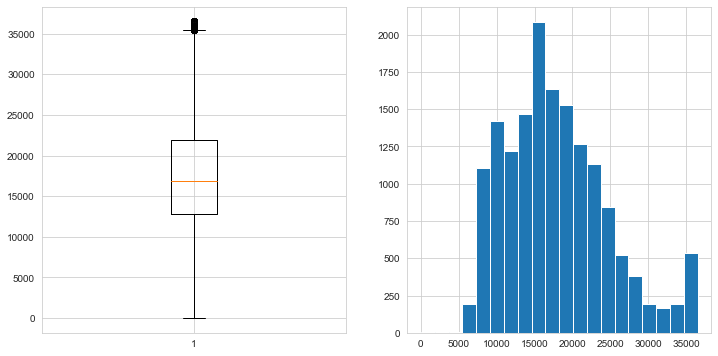

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.price)

plt.subplot(122)
plt.hist(df.price,bins=20);

In [20]:
df.price.describe()

count   15909.000
mean    17877.245
std      6887.950
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     36498.000
Name: price, dtype: float64

## km 

In [21]:
df.km.describe()

count    15909.000
mean     32084.265
std      36986.803
min          0.000
25%       2493.427
50%      20407.000
75%      46928.000
max     317000.000
Name: km, dtype: float64

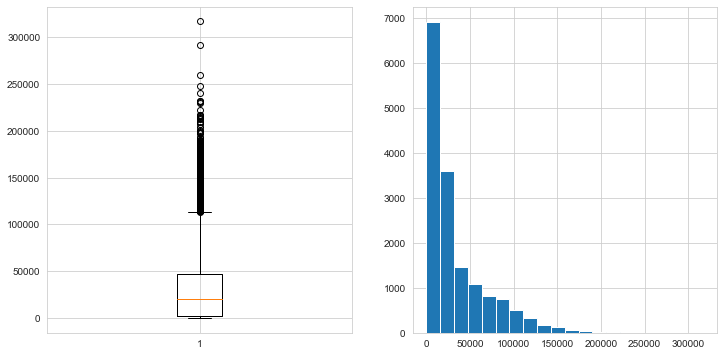

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.km)

plt.subplot(122)
plt.hist(df.km,bins=20);

In [23]:
limits(df,"km")

Lower Limit: -64158.43196202531
Upper limit: 113579.85917721518


In [24]:
outliers(df,"km")

700

In [25]:
winsorize_percentage_selection(df,"km")

90% quantile:    87999.0
92.5% quantile:  97000.0
95% quantile:    109959.99999999985
97.5% quantile:  130000.0
99% quantile:    154992.80000000002
99.9% quantile:  212671.85600000265


Since it is possible for company vehicles or vehicles used for long journeys to reach 317 thousand km, the values that appear as outliers are not considered as outliers. Therefore, no action will be taken.

## Gears

In [26]:
df.Gears.describe()

count   15909.000
mean        5.938
std         0.705
min         5.000
25%         5.000
50%         6.000
75%         6.000
max         8.000
Name: Gears, dtype: float64

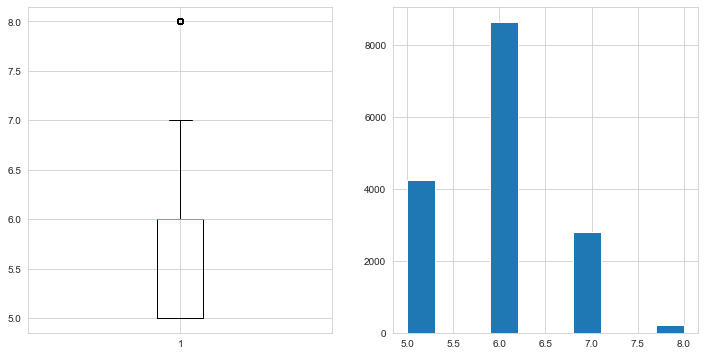

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Gears)

plt.subplot(122)
plt.hist(df.Gears,bins=10);

In [28]:
limits(df,"Gears")

Lower Limit: 3.5
Upper limit: 7.5


In [29]:
outliers(df,"Gears")

225

Values above the upper limit are not considered outliers, as it may be a vehicle with 8 gears.

## Previous_Owners

In [30]:
df.Previous_Owners.describe()

count   15909.000
mean        1.040
std         0.254
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         4.000
Name: Previous_Owners, dtype: float64

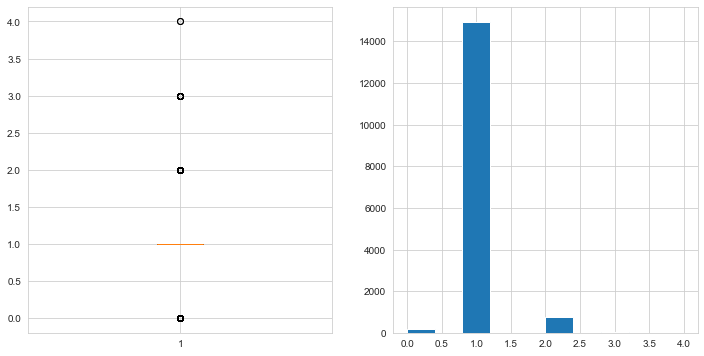

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Previous_Owners)

plt.subplot(122)
plt.hist(df.Previous_Owners,bins=10);

In [32]:
limits(df,"Previous_Owners")

Lower Limit: 1.0
Upper limit: 1.0


In [33]:
outliers(df,"Previous_Owners")

985

Since vehicle owners can change vehicles frequently for different reasons, it is considered normal that one vehicle can change 4 vehicles within 3 years.

## hp_kW 

In [34]:
df.hp_kW.describe()

count   15909.000
mean       88.371
std        26.834
min         1.000
25%        66.000
50%        85.000
75%       101.000
max       294.000
Name: hp_kW, dtype: float64

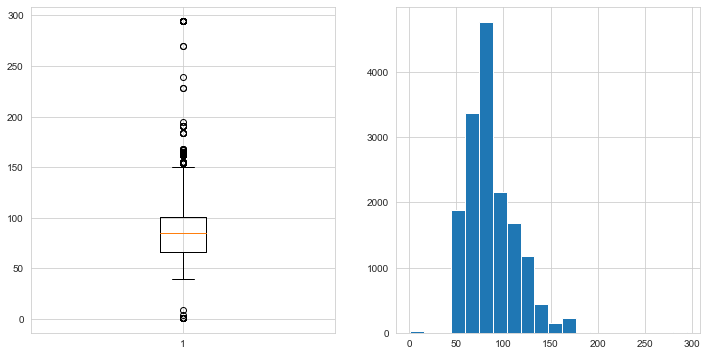

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.hp_kW)

plt.subplot(122)
plt.hist(df.hp_kW,bins=20);

In [36]:
limits(df,"hp_kW")

Lower Limit: 13.5
Upper limit: 153.5


In [37]:
outliers(df,"hp_kW")

427

It has been evaluated that there cannot be a vehicle below 50 hp_kW and these values have been converted to Nan values.

In [38]:
(df.hp_kW <50).sum()

25

In [39]:
df.hp_kW.loc[(df.hp_kW <50)] = 50

In [40]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [41]:
(df.hp_kW >153).sum()

405

In [42]:
winsorize_percentage_selection(df,"hp_kW")

90% quantile:    122.0
92.5% quantile:  125.0
95% quantile:    146.0
97.5% quantile:  154.0
99% quantile:    165.0
99.9% quantile:  294.0


%97.5 quantile has selected.

In [43]:
df.hp_kW= winsorize(df["hp_kW"],(0, 0.025),inplace=True)

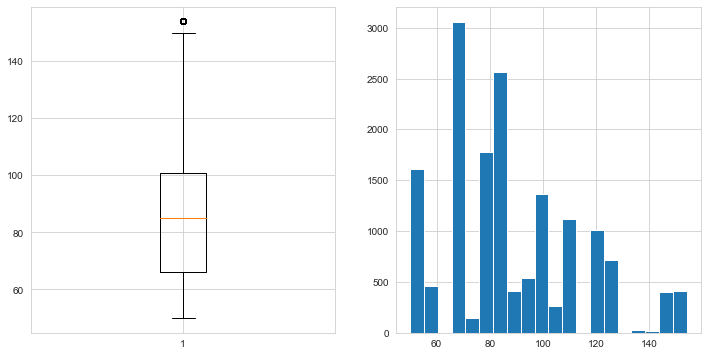

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.hp_kW)

plt.subplot(122)
plt.hist(df.hp_kW,bins=20);

## Age 

In [45]:
df.age.describe()

count   15909.000
mean        1.390
std         1.121
min         0.000
25%         0.000
50%         1.000
75%         2.000
max         3.000
Name: age, dtype: float64

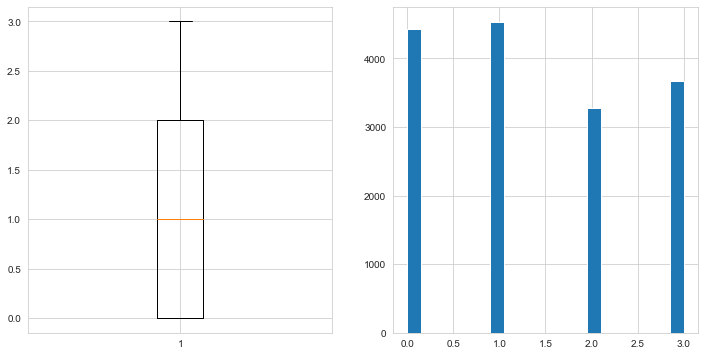

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.age)

plt.subplot(122)
plt.hist(df.age,bins=20);

In [47]:
limits(df,"age")

Lower Limit: -3.0
Upper limit: 5.0


In [48]:
outliers(df,"age")

0

## Nr_of_Doors 

In [49]:
df.Nr_of_Doors.describe()

count   15909.000
mean        4.661
std         0.642
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         7.000
Name: Nr_of_Doors, dtype: float64

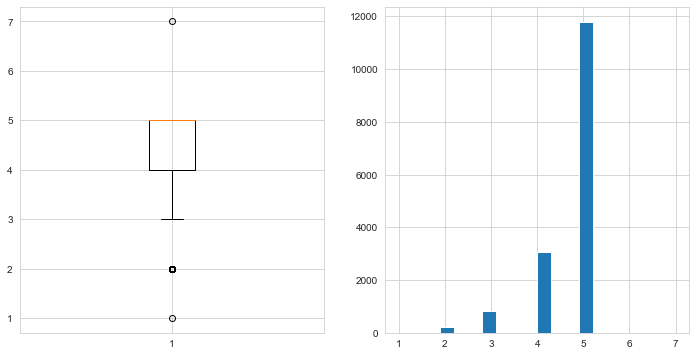

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Nr_of_Doors)

plt.subplot(122)
plt.hist(df.Nr_of_Doors,bins=20);

In [51]:
limits(df,"Nr_of_Doors")

Lower Limit: 2.5
Upper limit: 6.5


In [52]:
outliers(df,"Nr_of_Doors")

221

In [53]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [54]:
(df.Nr_of_Doors >5).sum()

1

In [55]:
(df.Nr_of_Doors < 2.5).sum()

220

In [56]:
(df.Nr_of_Doors == 1).sum()

1

In [57]:
(df.Nr_of_Doors == 0).sum()

0

In [58]:
df.Nr_of_Doors.loc[(df.Nr_of_Doors == 1)] = 2

['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'] model vehicles have been researched as having a min door number of 2 and a maximum number of doors of 5.

In [59]:
df= df.loc[(df.Nr_of_Doors >= 2.5) & (df.Nr_of_Doors <=5)]

In [60]:
df.Nr_of_Doors.describe()

count   15688.000
mean        4.698
std         0.563
min         3.000
25%         5.000
50%         5.000
75%         5.000
max         5.000
Name: Nr_of_Doors, dtype: float64

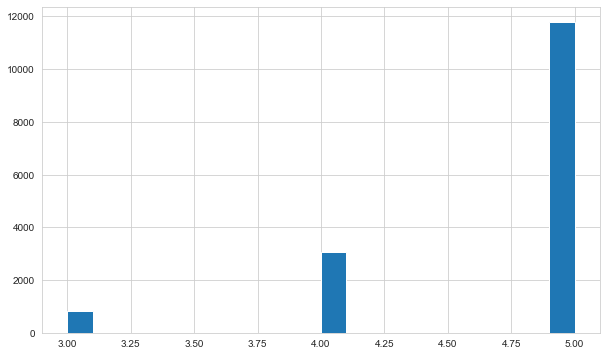

In [61]:
plt.hist(df.Nr_of_Doors,bins=20);

## Nr_of_Seats 

In [62]:
df.Nr_of_Seats.describe()

count   15688.000
mean        4.958
std         0.473
min         2.000
25%         5.000
50%         5.000
75%         5.000
max         7.000
Name: Nr_of_Seats, dtype: float64

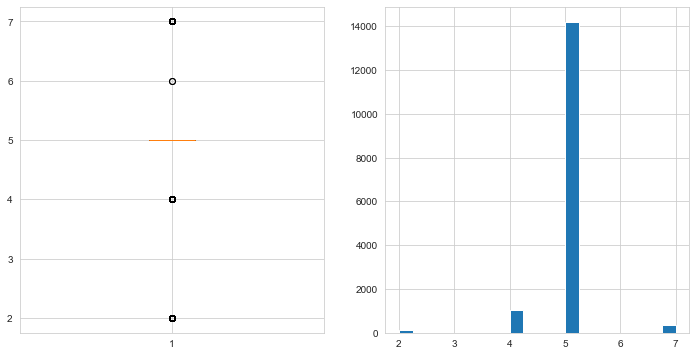

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Nr_of_Seats)

plt.subplot(122)
plt.hist(df.Nr_of_Seats,bins=20);

In [64]:
limits(df,"Nr_of_Seats")

Lower Limit: 5.0
Upper limit: 5.0


In [65]:
outliers(df,"Nr_of_Seats")

1508

In [66]:
df.groupby("make_model")["body_type"].value_counts()

make_model      body_type    
Audi A1         Sedans           1522
                Compact           970
                Station wagon      21
                Coupe               1
Audi A3         Sedans           2602
                Station wagon     281
                Compact           182
                Coupe               4
                Convertible         1
Opel Astra      Station wagon    1285
                Sedans           1053
                Compact           185
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            871
                Coupe              13
                Transporter         7
                Off-Road            3
Opel Insignia   Station wagon    1662
                Sedans            900
                Compact            27
                Off-Road            7
Renault Clio    Sedans            984
                Compact           483
                Stat

['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'] model vehicles do not have an outlier as they have a 7-seater body_type.

## Displacement_cc 

In [67]:
df.Displacement_cc.describe()

count   15688.000
mean     1427.412
std       330.509
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: Displacement_cc, dtype: float64

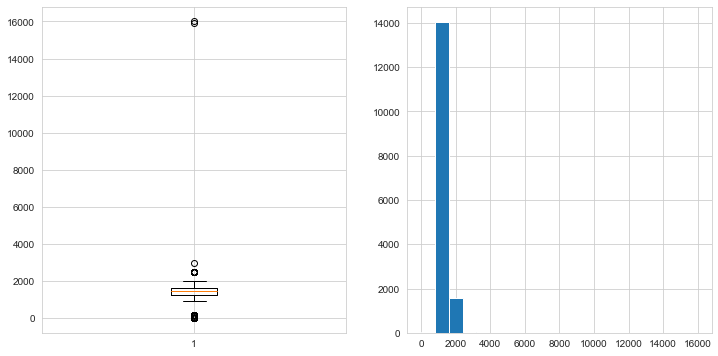

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Displacement_cc)

plt.subplot(122)
plt.hist(df.Displacement_cc,bins=20);

In [69]:
limits(df,"Displacement_cc")

Lower Limit: 675.5
Upper limit: 2151.5


In [70]:
outliers(df,"Displacement_cc")

74

In [71]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

<AxesSubplot:xlabel='make_model', ylabel='Displacement_cc'>

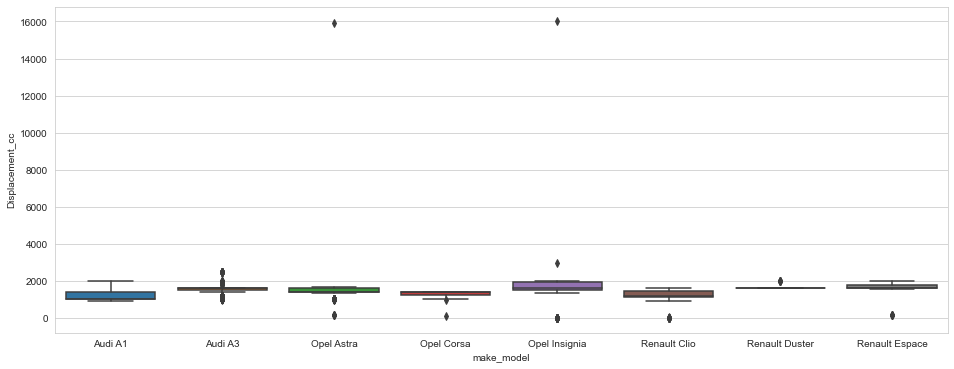

In [72]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="Displacement_cc", data=df)

In [73]:
(df.Displacement_cc > 3000).sum()

2

In [74]:
(df.Displacement_cc <1000).sum()

2912

In [75]:
df= df.loc[(df.Displacement_cc >= 1000) & (df.Displacement_cc <= 3000)]

['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',  'Renault Clio', 'Renault Duster', 'Renault Espace'] model vehicles have been investigated whether there is an engine below 1000 cc and no engine over 3000 cc.

In [76]:
df.Displacement_cc.describe()

count   12774.000
mean     1529.580
std       197.582
min      1000.000
25%      1398.000
50%      1598.000
75%      1598.000
max      2967.000
Name: Displacement_cc, dtype: float64

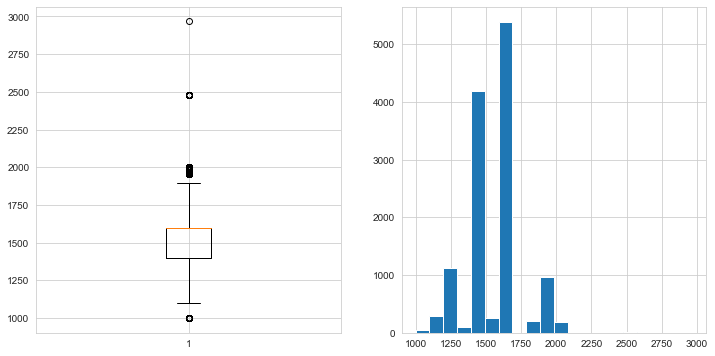

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Displacement_cc)

plt.subplot(122)
plt.hist(df.Displacement_cc,bins=20);

### Weight_kg

In [78]:
df.Weight_kg.describe()

count   12774.000
mean     1364.960
std       203.790
min         1.000
25%      1170.000
50%      1360.000
75%      1487.000
max      2471.000
Name: Weight_kg, dtype: float64

In [79]:
limits(df, "Weight_kg")

Lower Limit: 694.5
Upper limit: 1962.5


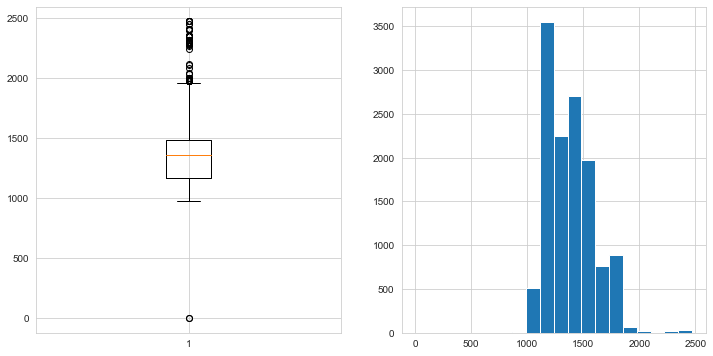

In [80]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Weight_kg)

plt.subplot(122)
plt.hist(df.Weight_kg,bins=20);

In [81]:
(df.Weight_kg < 1000).sum()

11

In [82]:
df =df.loc[(df.Weight_kg >= 1000) & (df.Weight_kg <= 3000)]

In [83]:
df.Weight_kg.describe()

count   12763.000
mean     1365.446
std       202.903
min      1010.000
25%      1170.000
50%      1360.000
75%      1487.000
max      2471.000
Name: Weight_kg, dtype: float64

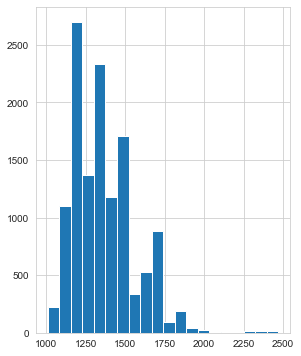

In [84]:
plt.subplot(122)
plt.hist(df.Weight_kg,bins=20);

### Consumption_comb

In [85]:
df.Consumption_comb.describe()

count   12763.000
mean        4.929
std         1.399
min         0.000
25%         4.000
50%         4.900
75%         5.544
max        55.000
Name: Consumption_comb, dtype: float64

In [86]:
limits(df,"Consumption_comb")

Lower Limit: 1.683610271903306
Upper limit: 7.8606495468278235


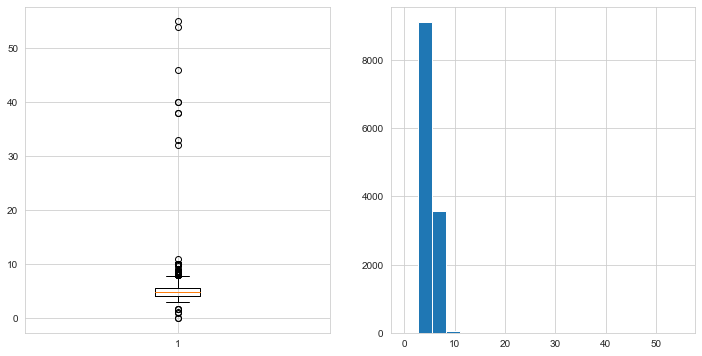

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Consumption_comb)

plt.subplot(122)
plt.hist(df.Consumption_comb,bins=20);

In [88]:
outliers(df, "Consumption_comb")

90

In [89]:
df = df.loc[~((df.Consumption_comb < 2.27) | (df.Consumption_comb > 7.41))]

In [90]:
df.Consumption_comb.describe()

count   12652.000
mean        4.876
std         0.912
min         3.000
25%         4.000
50%         4.900
75%         5.544
max         7.400
Name: Consumption_comb, dtype: float64

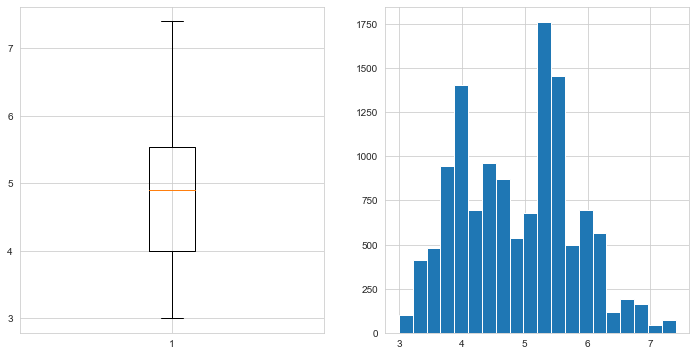

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.Consumption_comb)

plt.subplot(122)
plt.hist(df.Consumption_comb,bins=20);

### CO2_Emission

In [92]:
df.CO2_Emission.describe()

count   12652.000
mean      113.169
std        32.381
min         1.000
25%       104.000
50%       119.000
75%       130.000
max       191.000
Name: CO2_Emission, dtype: float64

In [93]:
limits(df, "CO2_Emission")

Lower Limit: 65.0
Upper limit: 169.0


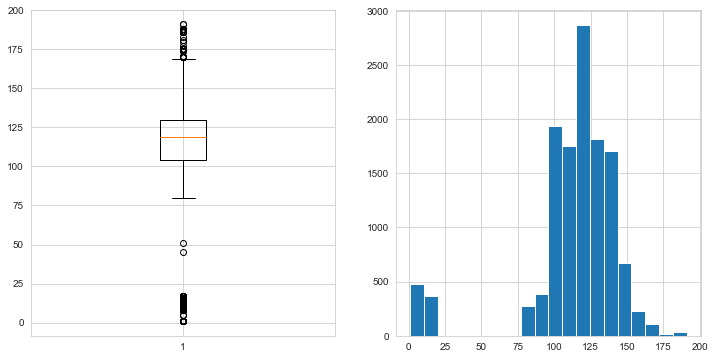

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.CO2_Emission)

plt.subplot(122)
plt.hist(df.CO2_Emission,bins=20);

In [95]:
outliers(df, "CO2_Emission")

912

In [96]:
winsorize_percentage_selection(df, "CO2_Emission")

90% quantile:    141.0
92.5% quantile:  145.0
95% quantile:    149.0
97.5% quantile:  153.0
99% quantile:    168.0
99.9% quantile:  187.0


99% quantile has selected.

In [97]:
df.CO2_Emission= winsorize(df["CO2_Emission"],(0, 0.01),inplace=True)

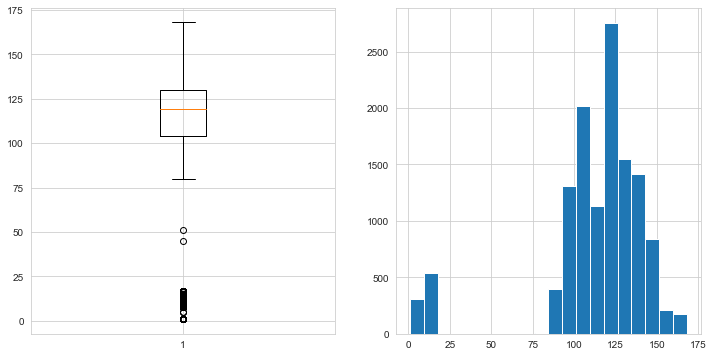

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.boxplot(df.CO2_Emission)

plt.subplot(122)
plt.hist(df.CO2_Emission,bins=20);

### END OF THE PART 3

In [99]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Gears,7.000,7.000,7.000
Extras,"Alloy wheels,Catalytic Converter,Voice Control","Alloy wheels,Sport seats,Sport suspension,Voic...","Alloy wheels,Voice Control"
Previous_Owners,2.000,1.000,1.000


In [100]:
df.shape

(12652, 26)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12652 entries, 0 to 15908
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           12652 non-null  object 
 1   body_type            12652 non-null  object 
 2   price                12652 non-null  int64  
 3   vat                  12652 non-null  object 
 4   km                   12652 non-null  float64
 5   Type                 12652 non-null  object 
 6   Fuel                 12652 non-null  object 
 7   Gears                12652 non-null  float64
 8   Extras               12652 non-null  object 
 9   Previous_Owners      12652 non-null  float64
 10  hp_kW                12652 non-null  float64
 11  age                  12652 non-null  float64
 12  Paint_Type           12652 non-null  object 
 13  Upholstery_type      12652 non-null  object 
 14  Nr_of_Doors          12652 non-null  float64
 15  Nr_of_Seats          12652 non-null 

In [102]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Extras                 0
Previous_Owners        0
hp_kW                  0
age                    0
Paint_Type             0
Upholstery_type        0
Nr_of_Doors            0
Nr_of_Seats            0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
Consumption_comb       0
CO2_Emission           0
Emission_Class         0
Comfort_Convenience    0
Entertainment_Media    0
Safety_Security        0
dtype: int64

### FINAL STEP

In [103]:
df.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
price,12652.000,17685.263,7077.755,13.000,12487.500,16500.000,21500.000,36498.000
km,12652.000,37023.895,38730.752,0.000,6671.750,24883.500,55000.000,317000.000
Gears,12652.000,5.971,0.653,5.000,6.000,6.000,6.000,8.000
Previous_Owners,12652.000,1.042,0.245,0.000,1.000,1.000,1.000,4.000
hp_kW,12652.000,91.102,26.106,50.000,66.000,85.000,110.000,154.000
age,12652.000,1.530,1.096,0.000,1.000,1.000,3.000,3.000
Nr_of_Doors,12652.000,4.693,0.569,3.000,4.000,5.000,5.000,5.000
Nr_of_Seats,12652.000,4.989,0.481,2.000,5.000,5.000,5.000,7.000
Displacement_cc,12652.000,1527.160,192.901,1000.000,1398.000,1598.000,1598.000,2000.000
Weight_kg,12652.000,1365.029,202.584,1010.000,1173.000,1360.000,1487.000,2471.000


In [104]:
numeric_columns = "price,km,Gears,Previous_Owners,hp_kW,age,Nr_of_Doors,Nr_of_Seats,Displacement_cc,Weight_kg,Consumption_comb,CO2_Emission".split(",")

In [105]:
df_numeric= df[numeric_columns]

In [106]:
df_numeric.head(3).T

,0,1,2
price,15770.000,14500.000,14640.000
km,56013.000,80000.000,83450.000
Gears,7.000,7.000,7.000
Previous_Owners,2.000,1.000,1.000
hp_kW,66.000,141.000,85.000
age,3.000,2.000,3.000
Nr_of_Doors,5.000,3.000,4.000
Nr_of_Seats,5.000,4.000,4.000
Displacement_cc,1422.000,1798.000,1598.000
Weight_kg,1220.000,1255.000,1135.000


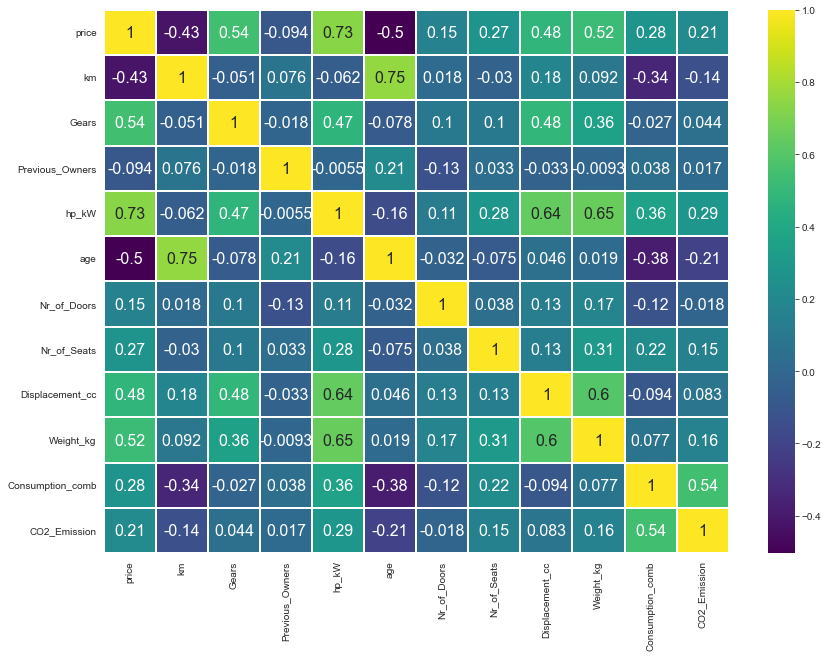

In [107]:
plt.figure(figsize = (14,10))
sns.heatmap(df_numeric.corr(), annot = True, cmap="viridis", linewidths=0.2, annot_kws = {"size": 16});

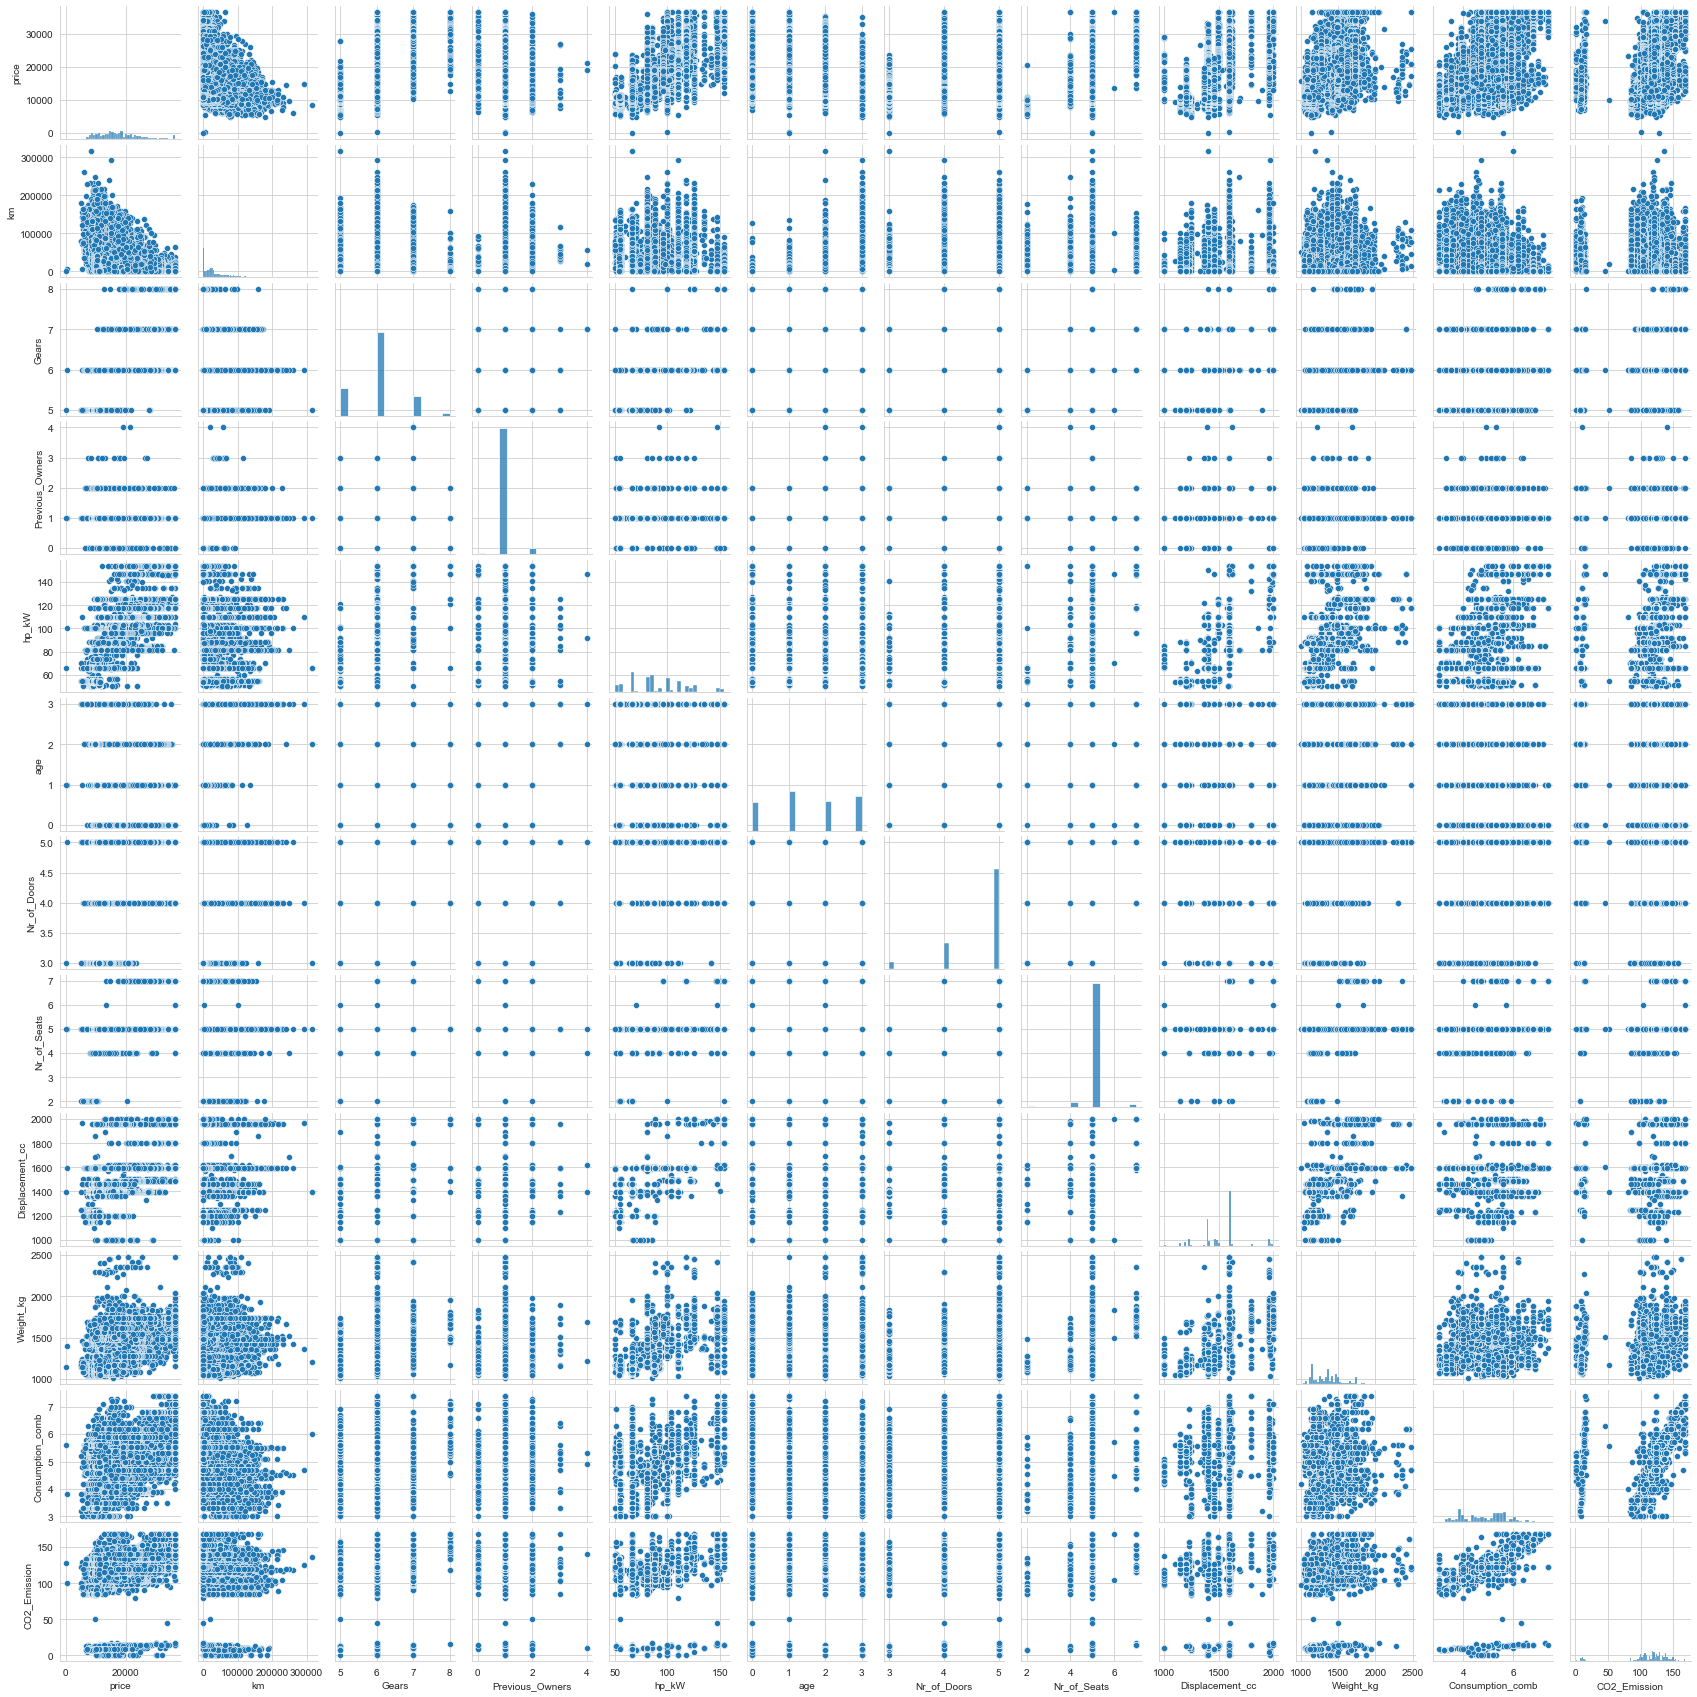

In [108]:
sns.pairplot(df_numeric, size=2);

In [109]:
df.to_csv("auto_scout_final_without_dummies.csv")

### DUMMY OPERATIONS

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12652 entries, 0 to 15908
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           12652 non-null  object 
 1   body_type            12652 non-null  object 
 2   price                12652 non-null  int64  
 3   vat                  12652 non-null  object 
 4   km                   12652 non-null  float64
 5   Type                 12652 non-null  object 
 6   Fuel                 12652 non-null  object 
 7   Gears                12652 non-null  float64
 8   Extras               12652 non-null  object 
 9   Previous_Owners      12652 non-null  float64
 10  hp_kW                12652 non-null  float64
 11  age                  12652 non-null  float64
 12  Paint_Type           12652 non-null  object 
 13  Upholstery_type      12652 non-null  object 
 14  Nr_of_Doors          12652 non-null  float64
 15  Nr_of_Seats          12652 non-null 

In [111]:
df.shape

(12652, 26)

In [112]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [113]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [114]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Fuel,Diesel,Benzine,Diesel
Gears,7.000,7.000,7.000
Previous_Owners,2.000,1.000,1.000
hp_kW,66.000,141.000,85.000


In [115]:
df_dummies= pd.get_dummies(df, drop_first=True)

In [117]:
df_dummies.shape

(12652, 136)

In [ ]:
df.to_csv("auto_scout_final_with_dummies.csv")